In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
file = '/nobackup/jakravit/data/HE60/output/EcoLight/excel/Msg_H_wind_H_sza.txt'

In [30]:
# file = 'MI_case1V1_0e6u36s5v0.txt'
rrsheader = ['in air', 'Rrs']
rrs_list = []

def aop(file):
    line_num = 0
    with open(file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        line_num += 1
        if all(x in line.strip().replace('"', '').replace("'", "") for x in rrsheader):
            header = line_num
            l = line
            # print (line_num, line)
        else:
            pass
        
    lines = np.arange(header,header+200,1)
    end = header+200
    rrs = []
    lw = []
    ed = []
    wl = []
    lu = []

    i = 0
    with open(file, "r+") as fp:
        # access each line
        while True:
            line = fp.readline()
            # check line number
            if i in lines:
                wl.append(line.strip().split('   ')[0] )
                rrs.append(line.strip().split('   ')[1] )
                ed.append(line.strip().split('   ')[2] )
                lw.append(line.strip().split('   ')[3])
                lu.append(line.strip().split('   ')[4] )
            # line number greater than needed exit the loop
            # lines[-1] give last item from list
            if i > end:
                break;
            i = i + 1
    
    wl = np.array(wl).astype(float)
    rrs = np.array(rrs).astype(float)
    lw = np.array(lw).astype(float)
    lu = np.array(lu).astype(float)
    ed = np.array(ed).astype(float)
    
    lg = lu-lw
    rrsg = lg / ed
    rrsgmean = rrsg.mean()
    rrstot = lu / ed
    
    return wl, rrs, rrsg, rrsgmean, rrstot
    
    

In [31]:
wl, rrs, rrsg, rrsgmean, rrstot = aop(file)

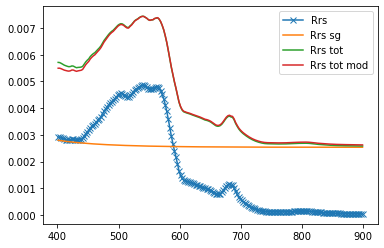

In [32]:
plt.plot(wl,rrs, label='Rrs', marker='x')
plt.plot(wl,rrsg, label = 'Rrs sg')
plt.plot(wl, rrstot, label = 'Rrs tot')
plt.plot(wl, rrs+rrsgmean, label='Rrs tot mod')
plt.legend()

In [ ]:
kparheader = ['in air', 'Rrs']

line_num = 0
with open(file, 'r') as f:
    lines = f.readlines()

for line in lines:
    line_num += 1
    if all(x in line.strip().replace('"', '').replace("'", "") for x in rrsheader):
        header = line_num
        l = line
        # print (line_num, line)
    else:
        pass   